In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np

In [2]:
mpl.rcParams['axes.unicode_minus'] = False #마이너스 부호 오류 보정
plt.rcParams['font.family'] = 'HYGothic-Medium' #한글 폰트는 HYGothic체로

## 1. Matplotlib 3D Plot

In [3]:
import pandas as pd
from mpl_toolkits import mplot3d

In [4]:
movie = pd.read_csv('movies.csv')
movie = movie.dropna(axis=0) #NA 제거

In [5]:
movie.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211


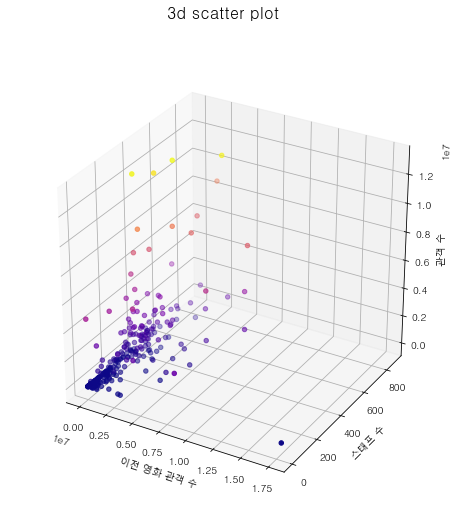

In [6]:
fig = plt.figure(figsize=(8, 8)) #subplot으로 지정하면 library 못먹임
ax = plt.axes(projection='3d') #도화지를 3d로
ax.scatter3D(movie['dir_prev_bfnum'], movie['num_staff'], movie['box_off_num'], c=movie['box_off_num'], cmap='plasma')
#scatter3D xyz모두 필요
ax.set_xlabel('이전 영화 관객 수')
ax.set_ylabel('스태프 수')
ax.set_zlabel('관객 수', rotation=90)
fig.suptitle('3d scatter plot', fontsize=16)
plt.show()

## 2. Different Ways to Use Seaborn

seaborn 사용할 때 코드가 더 간결해지기도 함!
축약어 sns.


In [7]:
import seaborn as sns

In [8]:
epl = pd.read_csv('epl.csv')

In [9]:
epl.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [10]:
epl2 = pd.read_csv('epl2.csv')
epl2 = epl2[(epl2['tournament']=='Premier League') & (epl2['season'].isin(['2018/2019', '2019/2020']))].reset_index(drop=True)

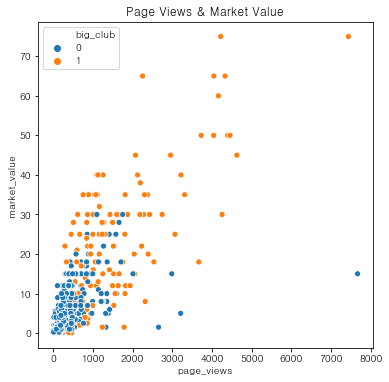

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='page_views', y='market_value', data=epl, hue='big_club') #하나의 axis로 취급...?
ax.set_title('Page Views & Market Value') #matplotlib의 명령어 그대로 사용 가능
plt.show()

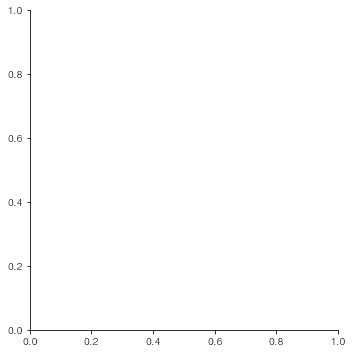

In [12]:
sns.FacetGrid(data=epl, height=5) #facetgrid는 격자무늬 그리드, sns로 빈 도화지 형태 틀 불러오는 것
plt.show()

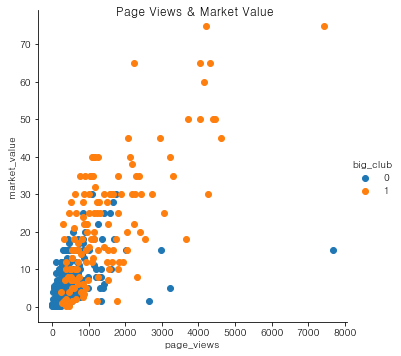

In [13]:
a = sns.FacetGrid(data=epl, hue='big_club', height=5)
a.map(plt.scatter, 'page_views', 'market_value').add_legend() #mapping함수 이용, 
a.fig.suptitle('Page Views & Market Value')
plt.show()

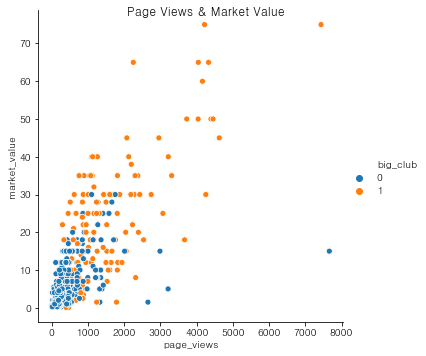

In [14]:
a = sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club') 
#kind에 희망하는 플롯 종류 쓰면 됨
#sns뒤에 relplot/catplot(catagorical plot)
#facetgrid는 여러개의 플롯 그리기에 편리함
a.fig.suptitle('Page Views & Market Value')
plt.show()

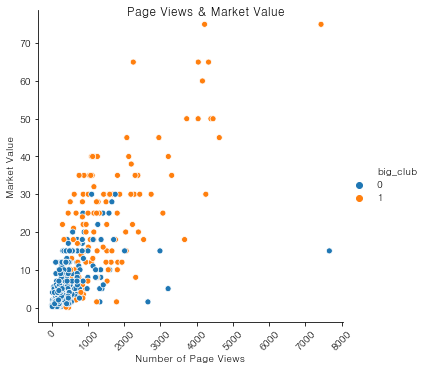

In [15]:
a = sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club', height=5, aspect=1)
a.fig.suptitle('Page Views & Market Value') 
a.set_xlabels('Number of Page Views') #matplotlib과 동일, 몇몇개는 다르다는 점 참고할 것
a.set_ylabels('Market Value')
a.set_xticklabels(rotation=45)
plt.show()

## 3. relplot

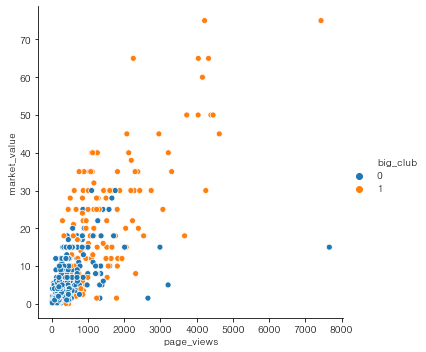

In [16]:
sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club')
plt.show()


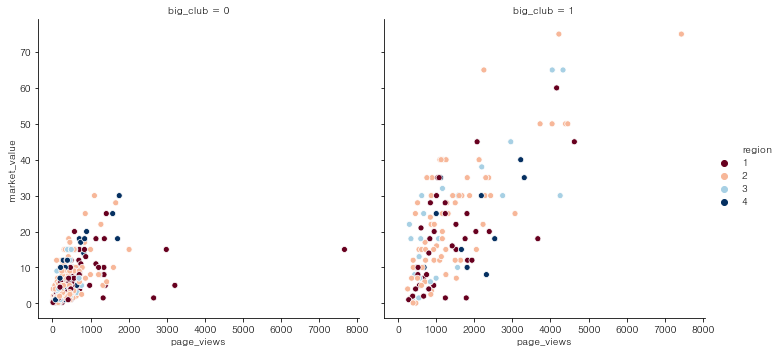

In [17]:
sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='region', col='big_club', palette='RdBu')
plt.show()
#palette로 색상 바꾸기 쉬움,
#col big_club에 따라서 그림 여러개 그려줌!!!

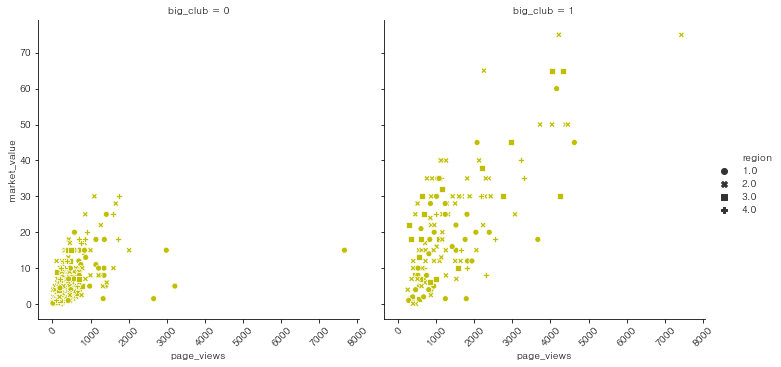

In [18]:
a = sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', style='region', col='big_club', color='y')
a.set_xticklabels(rotation=45)
plt.show()

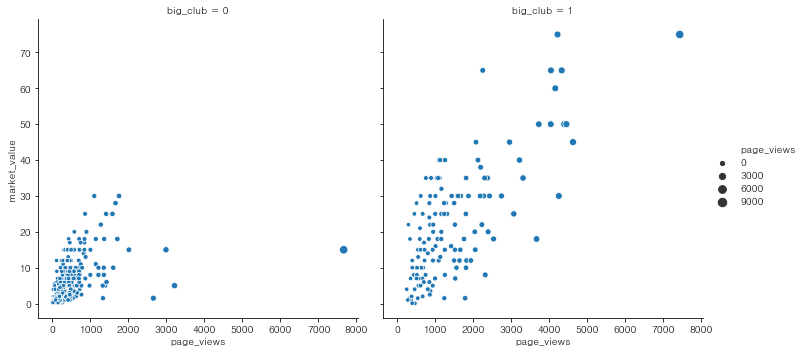

In [19]:
sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', size='page_views', col='big_club')
plt.show()

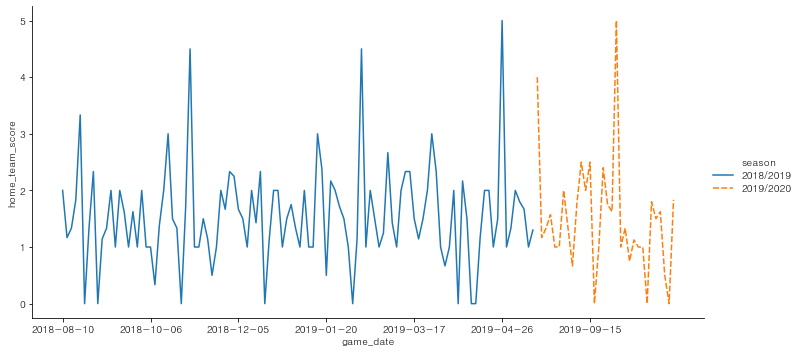

In [20]:
a = sns.relplot(x='game_date', y='home_team_score', data=epl2, kind='line', hue='season', style='season', ci=None, aspect=2)
a.set_xticklabels(step=20) #xtick을 해당 간격에만 표시, 너무 빽빽하게 표시되는 때 사용하면 좋을 듯
#data___무슨 형태?
plt.show()
#plot size조정 height를 조정하면 됨, aspect=2:가로길이 두배

## 4. Catplot

count, bar, box... 등드읃ㅇ

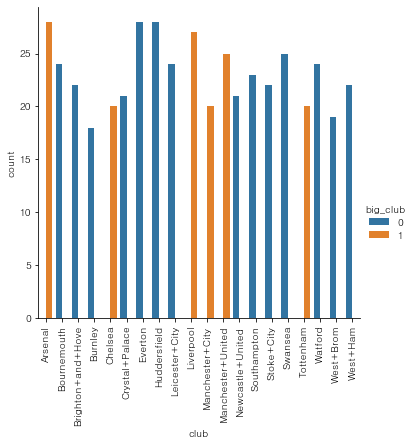

In [21]:
a = sns.catplot(x='club', data=epl, kind='count', hue='big_club')
a.set_xticklabels(rotation=90)
plt.show()

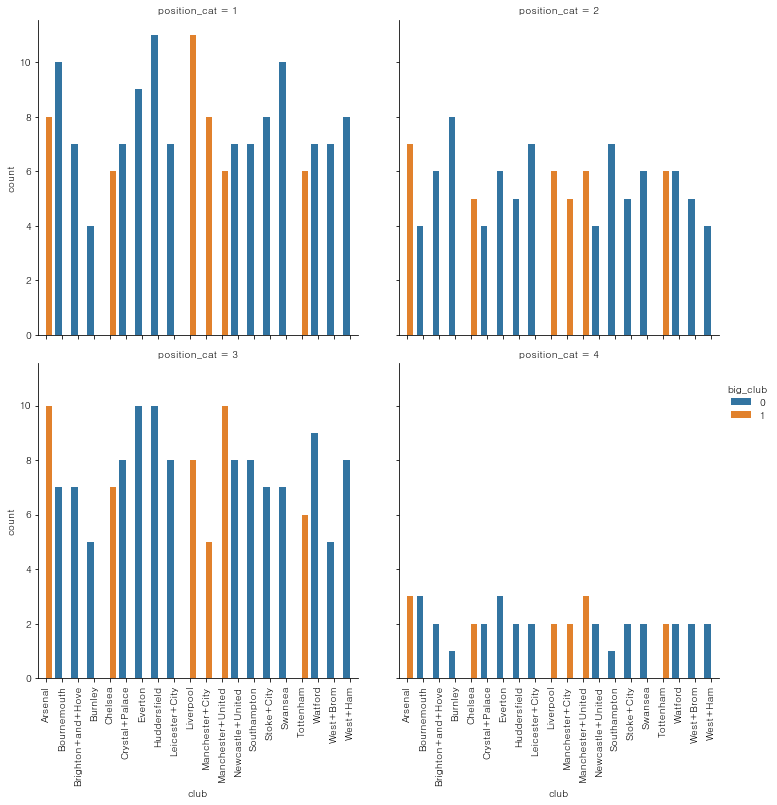

In [22]:
a = sns.catplot(x='club', data=epl, kind='count', hue='big_club', col='position_cat', col_wrap=2)
#col; column이 
#col_wrap: 한 행에 최대 몇개까지 그래프를 그릴 것인지
a.set_xticklabels(rotation=90)
plt.show()

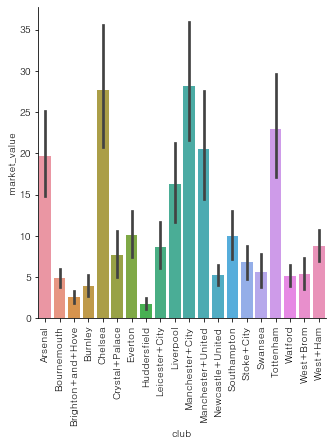

In [23]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='bar')
#errorbar 표시 
a.set_xticklabels(rotation=90)
plt.show()

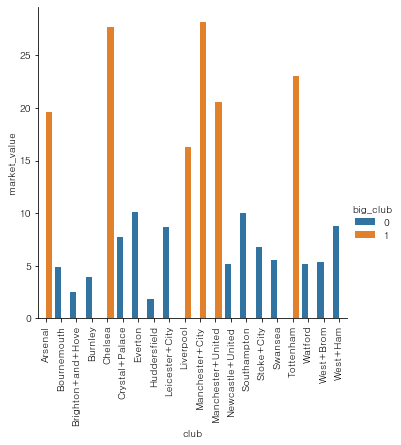

In [24]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='bar', ci=None, hue='big_club')
#ci= None (CI)에러바 없애줌
a.set_xticklabels(rotation=90)
plt.show()

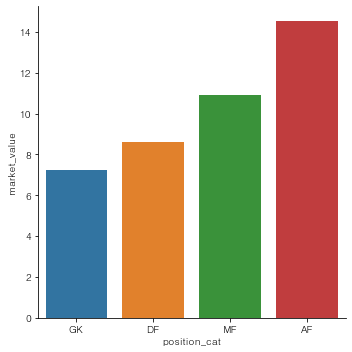

In [25]:
a = sns.catplot(x='position_cat', y='market_value', data=epl, kind='bar', ci=None, order=[4, 3, 2, 1])
a.set_xticklabels(['GK', 'DF', 'MF', 'AF']) #xticklabel 수동 변경 가능, order명령어로 순서 또한 수동 변경 가능
plt.show()

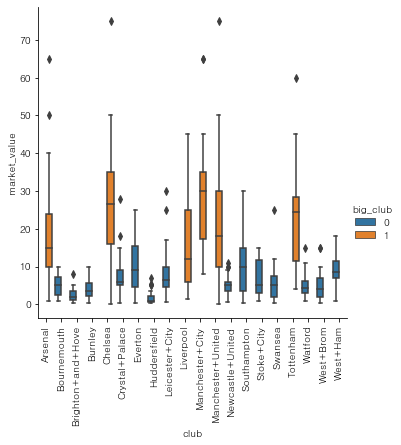

In [26]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club') #기초적 boxplot
a.set_xticklabels(rotation=90)
plt.show()

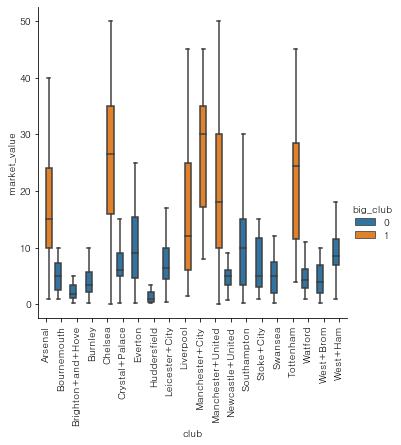

In [27]:
#outlier없애고 수염 길이는 늘리는 방법 : sym=''
a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club', sym='')
a.set_xticklabels(rotation=90)
plt.show()

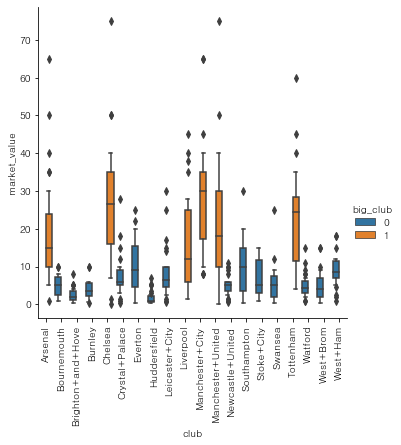

In [28]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club', whis=0.5)
a.set_xticklabels(rotation=90)
plt.show()
#whis=0.5 whisker의 길이를 IQR에서의 1.5배에서 0.5배로 조정 가능

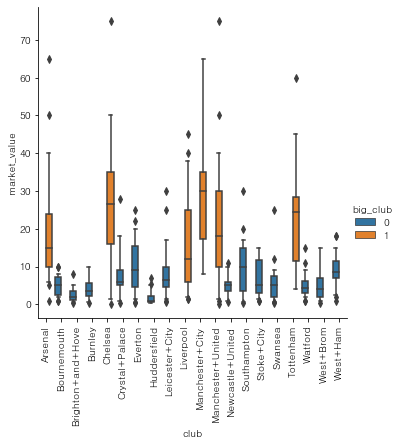

In [29]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club', whis=[5, 95])
a.set_xticklabels(rotation=90)
plt.show()

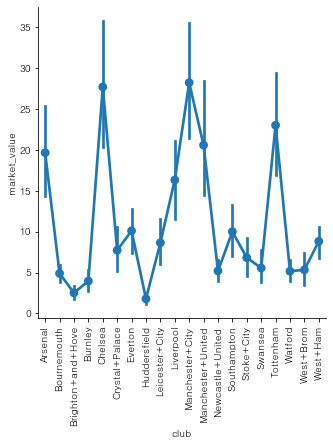

In [30]:
#point plot
a = sns.catplot(x='club', y='market_value', data=epl, kind='point')
a.set_xticklabels(rotation=90)
plt.show()

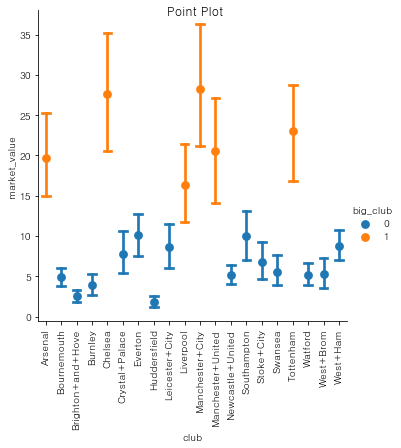

In [31]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='point', hue='big_club', capsize=0.5, join=False)
#capsize로 가로줄 만들기
#join=False로 두면 지저분하게 연결된 선을 지우기 가능 
a.set_xticklabels(rotation=90)
a.fig.suptitle('Point Plot')
plt.show()

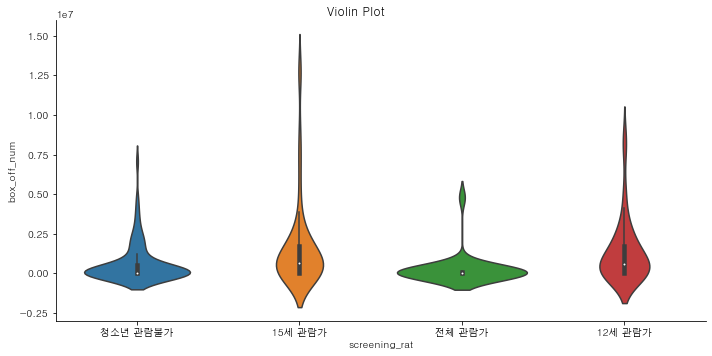

In [32]:
a = sns.catplot(x='screening_rat', y='box_off_num', data=movie, kind='violin', aspect=2)
#데이터 분포의 개형을 같이 나타내주는 플롯
#안에 박스플롯 숨어있음
# a라는 변수로 할당 안해도 되지만, .___으로 계속 이어가야해서 좀 복잡
a.fig.suptitle('Violin Plot')
plt.show()

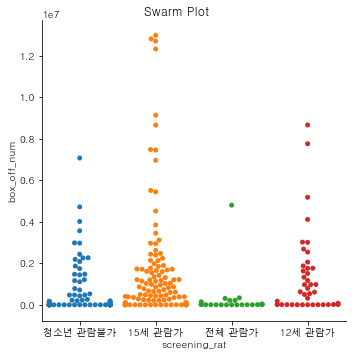

In [33]:
a = sns.catplot(x='screening_rat', y='box_off_num', data=movie, kind='swarm')
#데이터가 그 점에 얼마나 모여있는지 알려주는 것, kind ='swarm'
a.fig.suptitle('Swarm Plot')
plt.show()

## 5. other plots

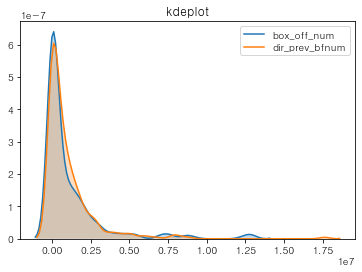

In [34]:
fig, ax = plt.subplots() #한번에 두개 그리면 axis하나에 들어가도록 제어를 하고 시작, 지정하고 들어가면 더 쉬워서,,,??
#그리드를 axis안에 넣는 거라고 생각하기
sns.kdeplot(data=movie['box_off_num'], shade=True) #곡선 표형+스무딩 해서 개형 파악하기 위한 그래프
#shade=True 겹치게...? 그 안에 색에 칠해지는 것
sns.kdeplot(data=movie['dir_prev_bfnum'], shade=True) #그냥 따로 지정 안하고 두개 그리니까
ax.set_title('kdeplot')
plt.show()

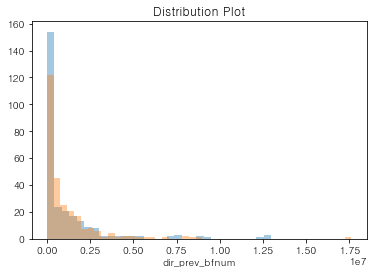

In [35]:
fig, ax = plt.subplots()
#분포확인할 때 이용, 같은 스케일링이면 이렇게 비교가 가능함
sns.distplot(movie['box_off_num'], kde=False) #False지정안하면 kde랑 같이 나온다?
sns.distplot(movie['dir_prev_bfnum'], kde=False)
ax.set_title('Distribution Plot')
plt.show()

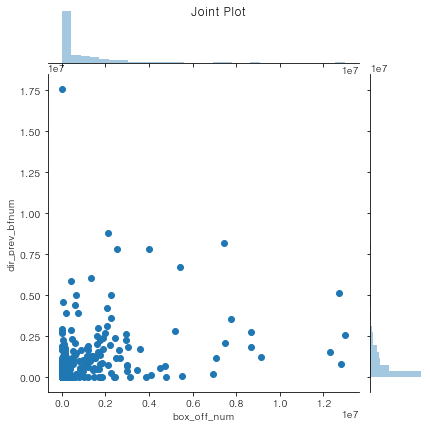

In [36]:
a = sns.jointplot(x='box_off_num', y='dir_prev_bfnum', data=movie)
a.fig.suptitle('Joint Plot')
plt.show()

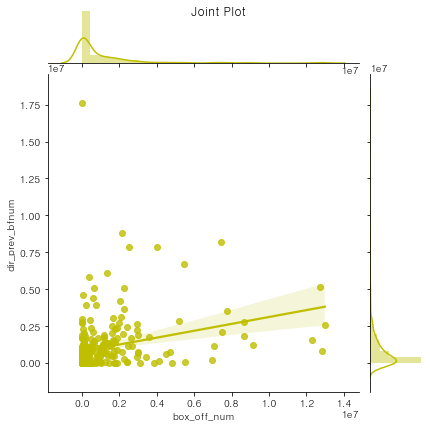

In [37]:
#다변량이면 합쳤을 때 정규분포 안따를 수도 있어서 이렇게 합쳐서 그림
a = sns.jointplot(x='box_off_num', y='dir_prev_bfnum', data=movie, kind='reg', color='y')
#kind='reg' regression 저절로 해줌, 단순선형회귀에서 변환 어떻게 할지 확인할 때 유용
a.fig.suptitle('Joint Plot') #한번에 타이틀 먹이기
plt.show()

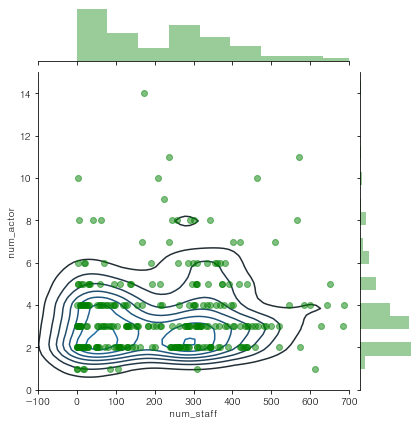

In [38]:
a = sns.jointplot(x=movie['num_staff'], y=movie['num_actor'], alpha=0.5, data=movie, color='g')
#alpha 투명도 지정
a.plot_joint(sns.kdeplot, zorder=0, n_levels=7) #안에다가 새로운 plot을 그릴 수 있음
a.ax_joint.set_xlim(-100, 700) #joint grid 이면 명령어가 살짝 달라진다...?
a.ax_joint.set_ylim(0, 15)
plt.show()
#등고선 그리면 쌍봉분포임을 확인 가능, 다차원데이터에서 수식을 적용할때 multivariate normal 등등의 가정사항 체크하는데 좋다?

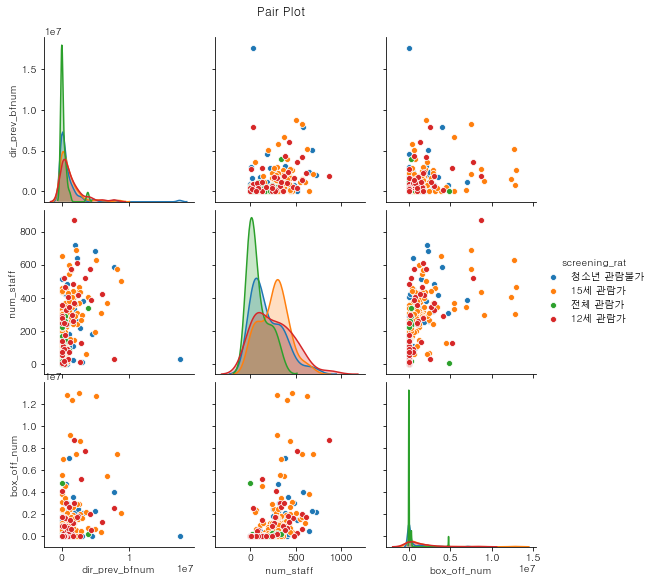

In [39]:
##pair plot
#대각선은 변수별
#대각선 외는 산점도
a = sns.pairplot(data=movie[['dir_prev_bfnum', 'num_staff', 'box_off_num', 'screening_rat']], hue='screening_rat')
#hue='_' _에 따라서 색감이 바뀜?
#pairgrid는 이상한걸 붙여준다? grid 계열의 차이로 달라짐?

a.fig.suptitle('Pair Plot', x=0.43, y=1.05) #좌표가 이상하게 나오니까 x,y값 따로 지정해주는 것이 좋음

plt.show()

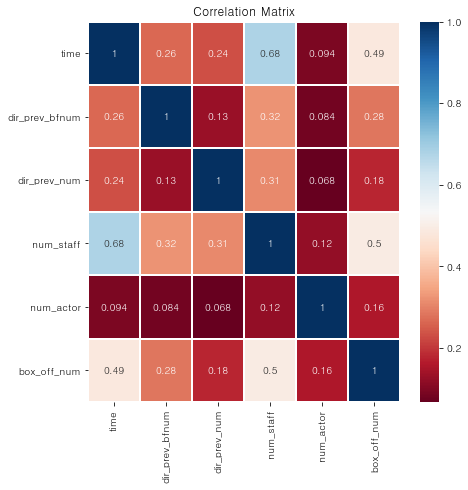

In [40]:
#heatmap: 상관계수행렬을 그림으로 시각화
#관계가 있으면 진한색깔 etc, cmap바꿔서 색감 조정 가능
fig, ax = plt.subplots(figsize=(7, 7))# 사이즈 조정
a = sns.heatmap(movie.corr(), annot=True, linewidths=1, cmap='RdBu') #annot=True 숫자 표현
#movie.corr() 범주형의 corr는 알아서 지워줌
#linewidth 네모 간격 조정
ax.set_title('Correlation Matrix')
plt.show()

### 6. Style Change

한번 바꾸면 모든 설정이 이렇게 바뀌므로 디폴트로 다시 바꾸려면 다시 설정해야함

In [41]:
sns.set_style('whitegrid') #자동으로 그리도 설정 #white가 디폴트

In [42]:
sns.set_palette('RdBu') #팔레트 변경

In [43]:
sns.set_context('poster') 

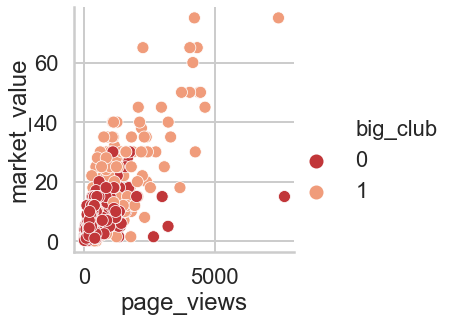

In [44]:
sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club')
plt.show()

In [45]:
sns.set_style('darkgrid')

In [46]:
sns.set_palette(['#39A7D0', '#36ADA4'])

In [47]:
sns.set_context('talk')#그래프의 확대되는 사이즈가 다름, 

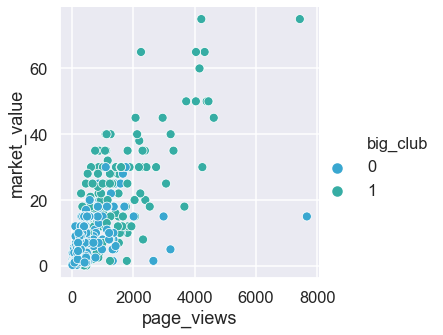

In [48]:
sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club')
plt.show()

# QUIZ

### Quiz1

Cmap은 여기사 찾기
https://matplotlib.org/tutorials/colors/colormaps.html

color name은 여기서 찾기
https://matplotlib.org/3.1.0/gallery/color/named_colors.html

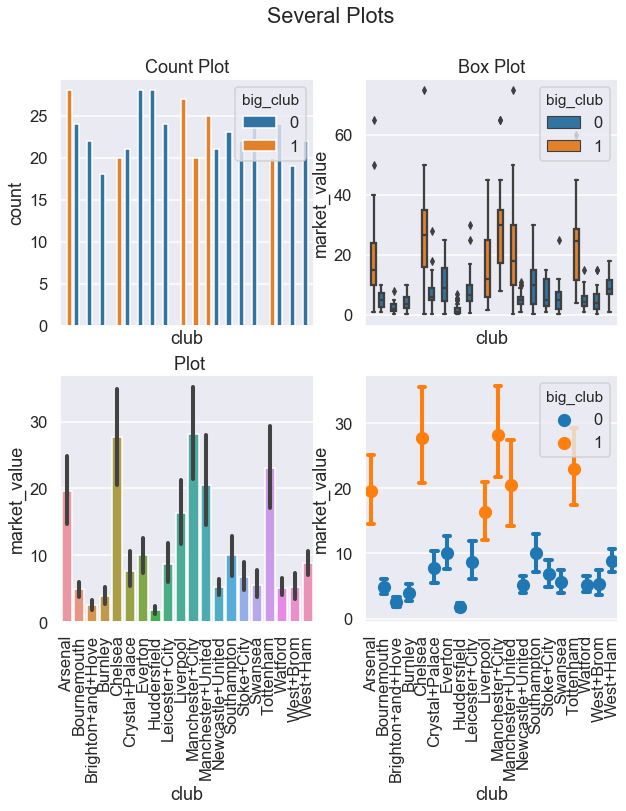

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True)

sns.set_palette(['tab:blue','tab:orange'])
sns.countplot(x='club', data=epl, hue='big_club', ax=ax[0, 0])
sns.boxplot(x='club', y='market_value', data=epl,  hue='big_club',ax=ax[0, 1])
sns.barplot(x='club', y='market_value', data=epl, ax=ax[1, 0])
sns.pointplot(x='club', y='market_value', data=epl, hue='big_club', capsize=0.5, join=False,ax=ax[1, 1])
 
ax[1, 0].set_xticklabels(labels=epl['club'].unique(), rotation=90) 
ax[1, 1].set_xticklabels(labels=epl['club'].unique(), rotation=90)
#밑에 두개만 나오면 되니까 [0,0]과[0,1]은 굳이 지정할 필요 없음

ax[0,0].set_title("Count Plot")
ax[0,1].set_title("Box Plot")
ax[1,0].set_title(" Plot")
ax[0,0].set_title("Count Plot")

fig.suptitle("Several Plots")

plt.show()

### Quiz 2

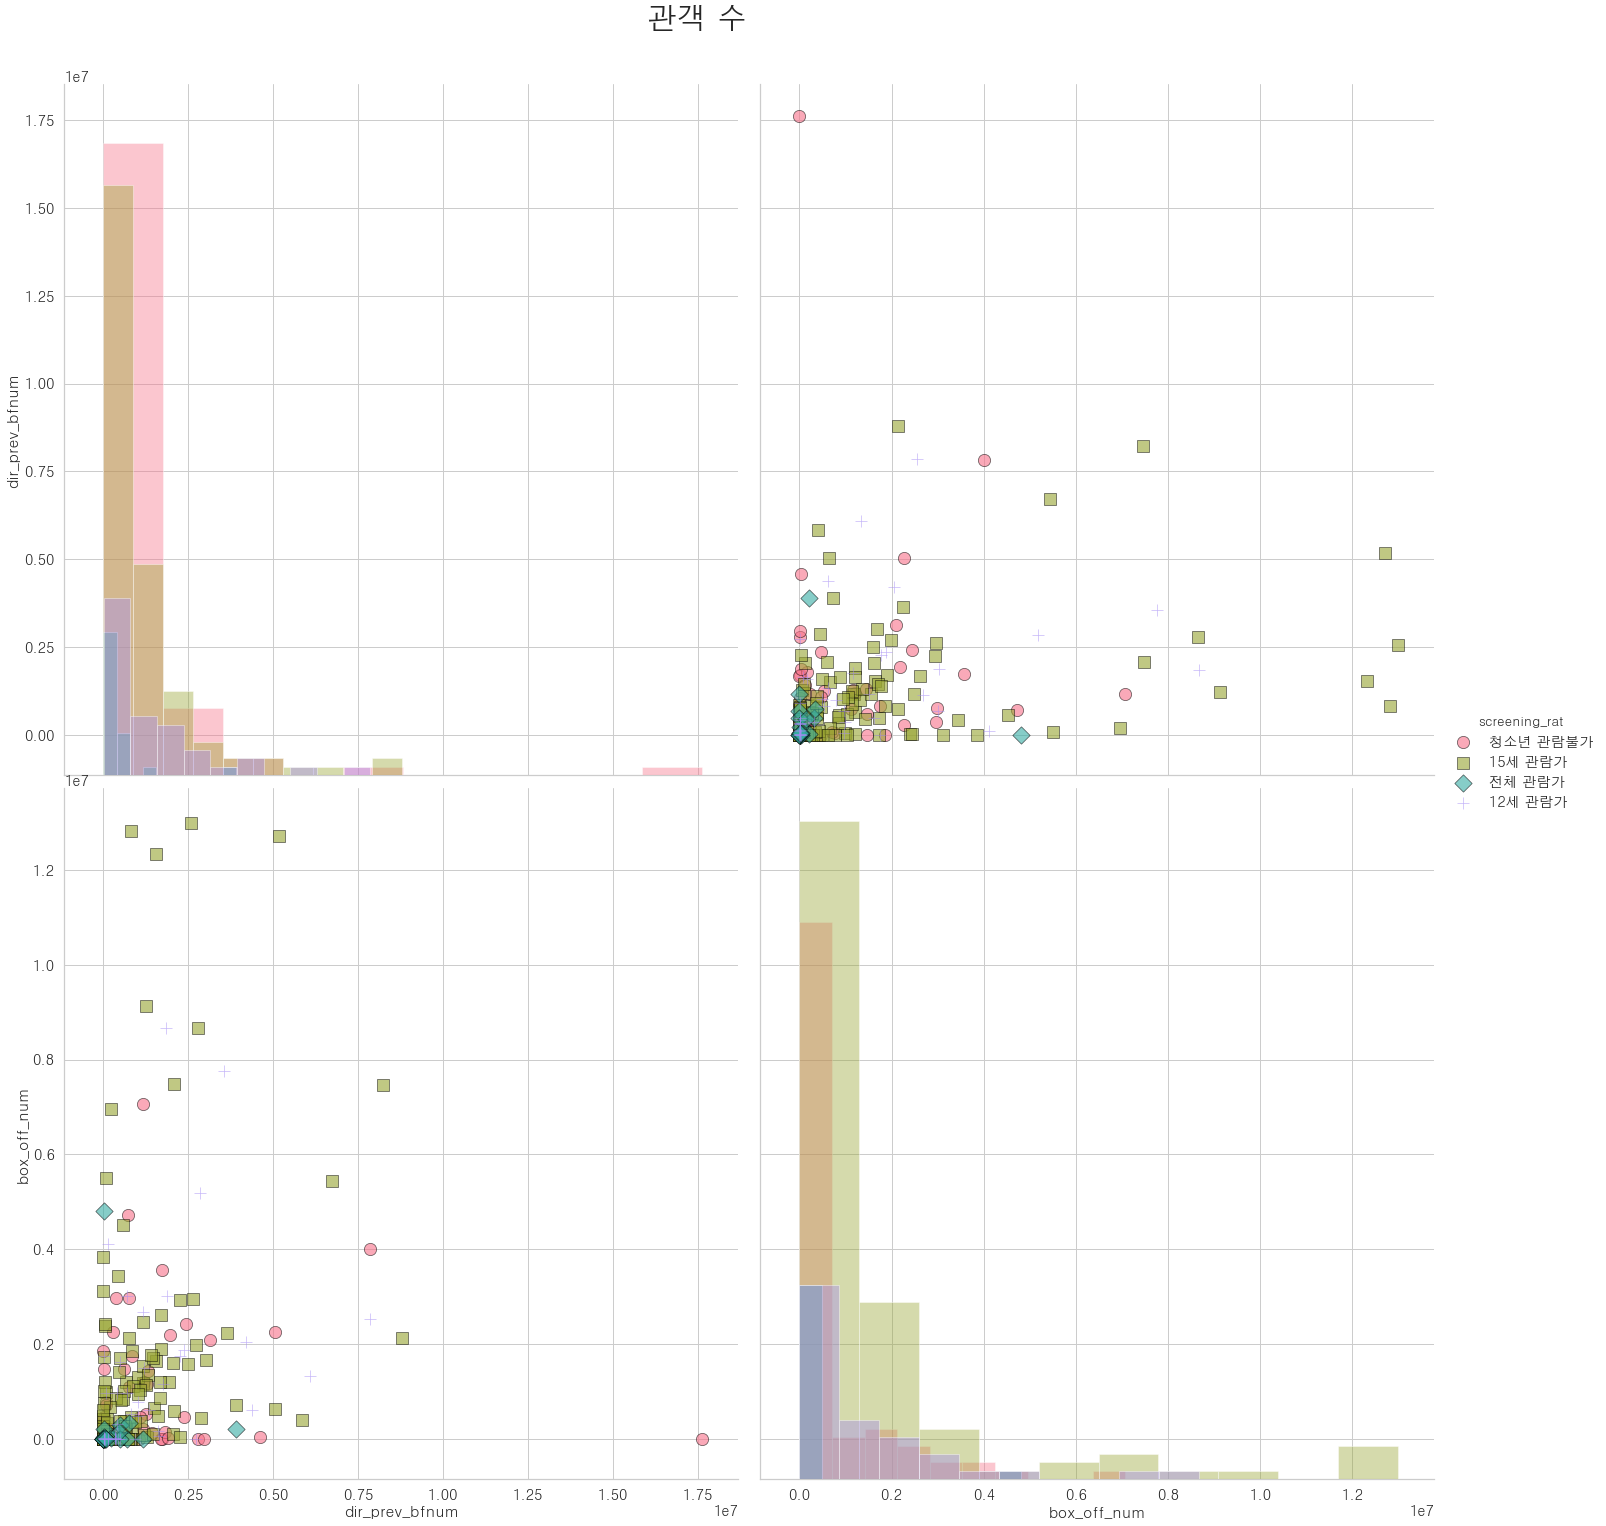

In [78]:
sns.set(font='HYGothic-Medium', font_scale=1.3, style='whitegrid')
a = sns.pairplot(movie[['dir_prev_bfnum', 'box_off_num', 'screening_rat']], hue='screening_rat',
                 markers=['o', 's', 'D', '+'], 
                 diag_kind='hist', diag_kws={'alpha':0.4}, plot_kws={'alpha':0.6,'s':150, 'edgecolor':"black"},#alpha로 투명도, s로 marker size지정
                 palette='husl', height=10)
a.fig.suptitle('관객 수', x=0.43, y=1.05, fontsize=30)
plt.show()

# 실습

https://www.kaggle.com/spscientist/students-performance-in-exams

In [111]:
exam= pd.read_csv('StudentsPerformance.csv')
exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


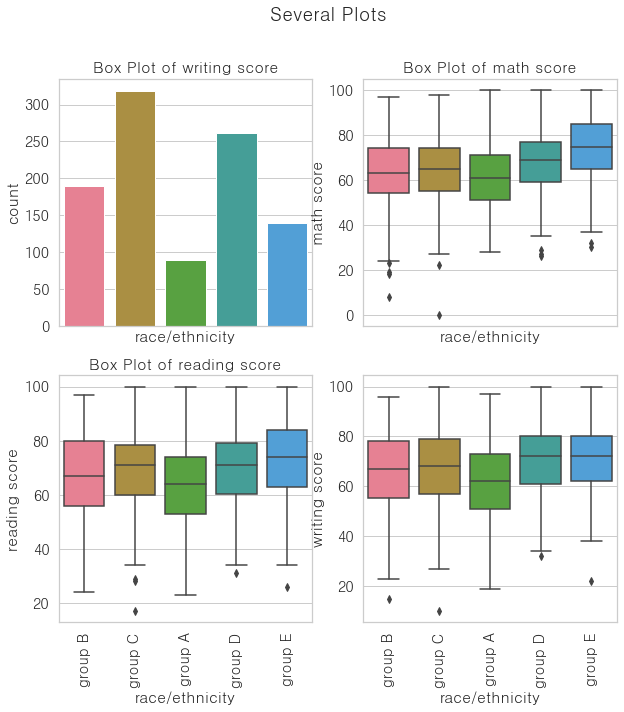

In [167]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True)

sns.set_palette("husl")
sns.countplot(x='race/ethnicity', data=exam,  ax=ax[0, 0])
sns.boxplot(x='race/ethnicity', y='math score',  data=exam, ax=ax[0, 1])
sns.boxplot(x='race/ethnicity', y='reading score', data=exam, ax=ax[1, 0])
sns.boxplot(x='race/ethnicity', y='writing score', data=exam,  ax=ax[1, 1])
 
ax[1, 0].set_xticklabels(labels=exam['race/ethnicity'].unique(),rotation=90)    
ax[1, 1].set_xticklabels(labels=exam['race/ethnicity'].unique(),rotation=90) 
#밑에 두개만 나오면 되니까 [0,0]과[0,1]은 굳이 지정할 필요 없음

ax[0,0].set_title("Count Plot")
ax[0,1].set_title("Box Plot of math score")
ax[1,0].set_title("Box Plot of reading score")
ax[0,0].set_title("Box Plot of writing score")

fig.suptitle("Several Plots")

plt.show()

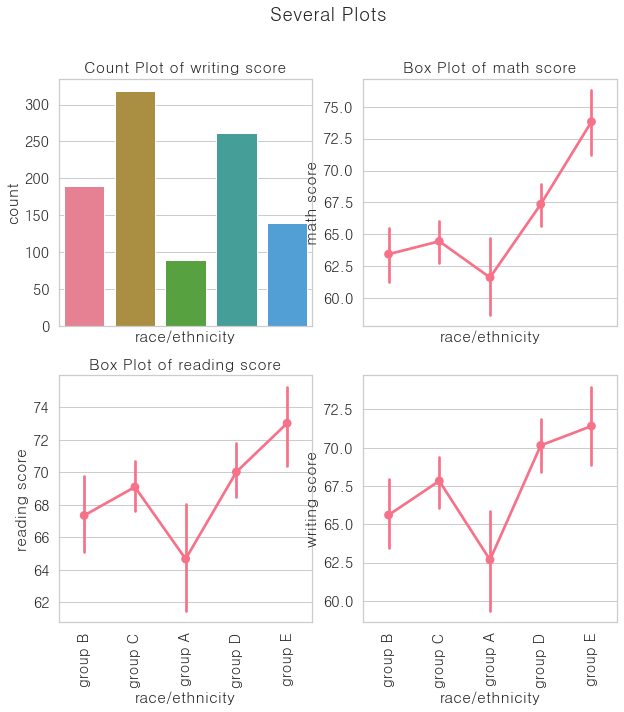

In [168]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True)

sns.set_palette("husl")

sns.countplot(x='race/ethnicity', data=exam,  ax=ax[0, 0])
sns.pointplot(x='race/ethnicity', y='math score',  data=exam,join=True, ax=ax[0, 1])
sns.pointplot(x='race/ethnicity', y='reading score', data=exam,join=True, ax=ax[1, 0])
sns.pointplot(x='race/ethnicity', y='writing score', data=exam,join=True, ax=ax[1,1])
 
ax[1, 0].set_xticklabels(labels=exam['race/ethnicity'].unique(),rotation=90)    
ax[1, 1].set_xticklabels(labels=exam['race/ethnicity'].unique(),rotation=90) 
#밑에 두개만 나오면 되니까 [0,0]과[0,1]은 굳이 지정할 필요 없음

ax[0,0].set_title("Count Plot")
ax[0,1].set_title("Box Plot of math score")
ax[1,0].set_title("Box Plot of reading score")
ax[0,0].set_title("Count Plot of writing score")

fig.suptitle("Several Plots")

plt.show()

전반적으로 Group A가 성적이 낮고, Group E가 높음

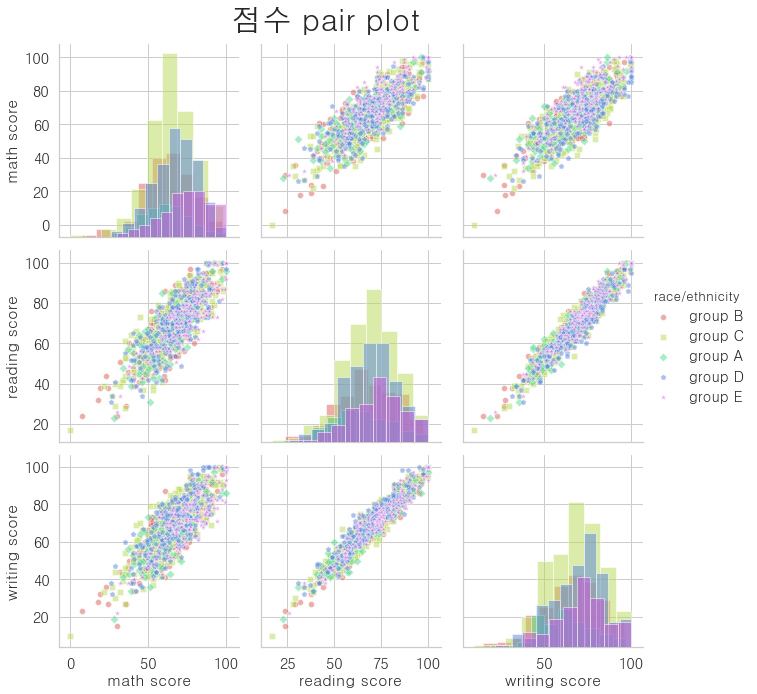

In [142]:
sns.set(font='HYGothic-Medium', font_scale=1.3, style='whitegrid')
a = sns.pairplot(exam[['math score', 'reading score', 'writing score', 'race/ethnicity']], hue='race/ethnicity',
                 markers=['o', 's', 'D', 'p', '*'], 
                 diag_kind='hist', diag_kws={'alpha':0.5}, plot_kws={'alpha':0.5,'edgecolor':"white"},
                 palette='hls', height=3)
#alpha로 투명도, s로 marker size지정
a.fig.suptitle('점수 pair plot', x=0.43, y=1.05, fontsize=30)
plt.show()

reading score와 writing score의 상관관계가 강해보임

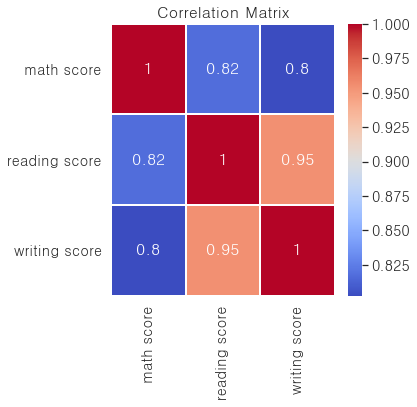

In [144]:
fig, ax = plt.subplots(figsize=(5, 5))
a = sns.heatmap(exam.corr(), annot=True, linewidths=1, cmap='coolwarm')#annot=True 숫자 표현
ax.set_title('Correlation Matrix')
plt.show()

heatmap으로 확인하면 reading과 writing score의 corr도 높지만 두 변수와 math score와의 corr또한 높음.

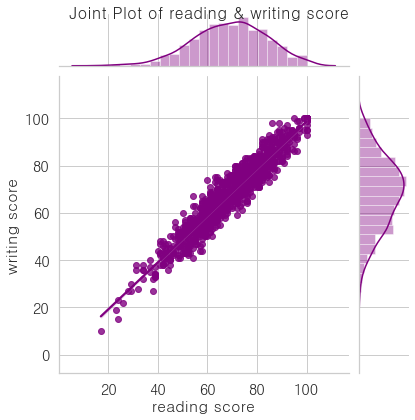

In [151]:
a = sns.jointplot(x=exam['reading score'], y=exam['writing score'], kind='reg', data=exam, color='purple')
a.fig.suptitle('Joint Plot of reading & writing score', fontsize=16)
plt.show()

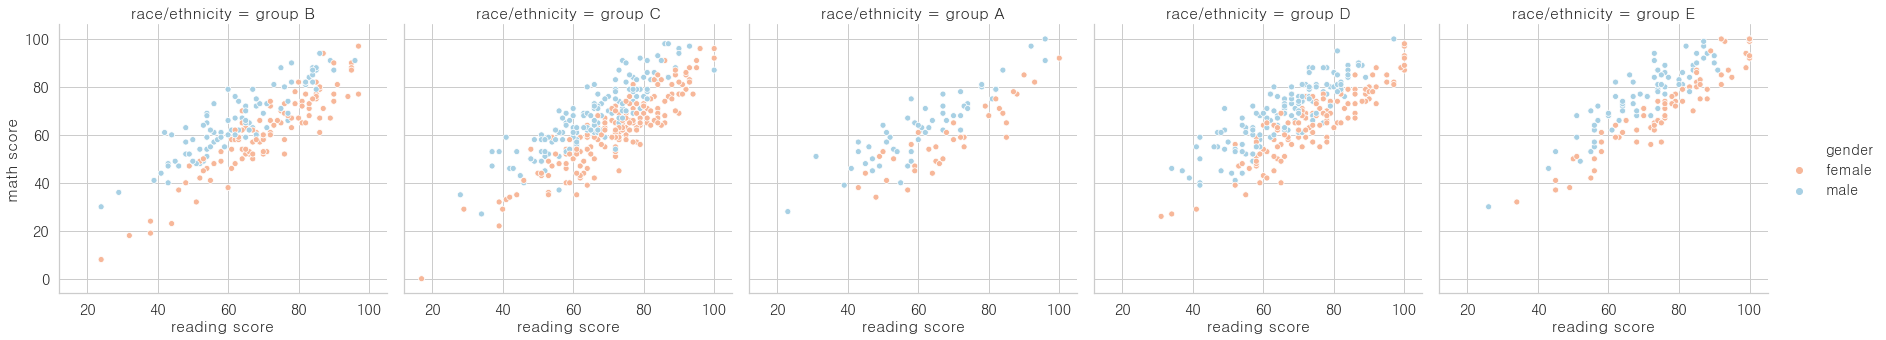

In [153]:
sns.relplot(x='reading score', y='math score', data=exam, kind='scatter', hue='gender', col='race/ethnicity', palette='RdBu')
fig.suptitle("그룹 및 성별에 따른 점수 분포")
plt.show()

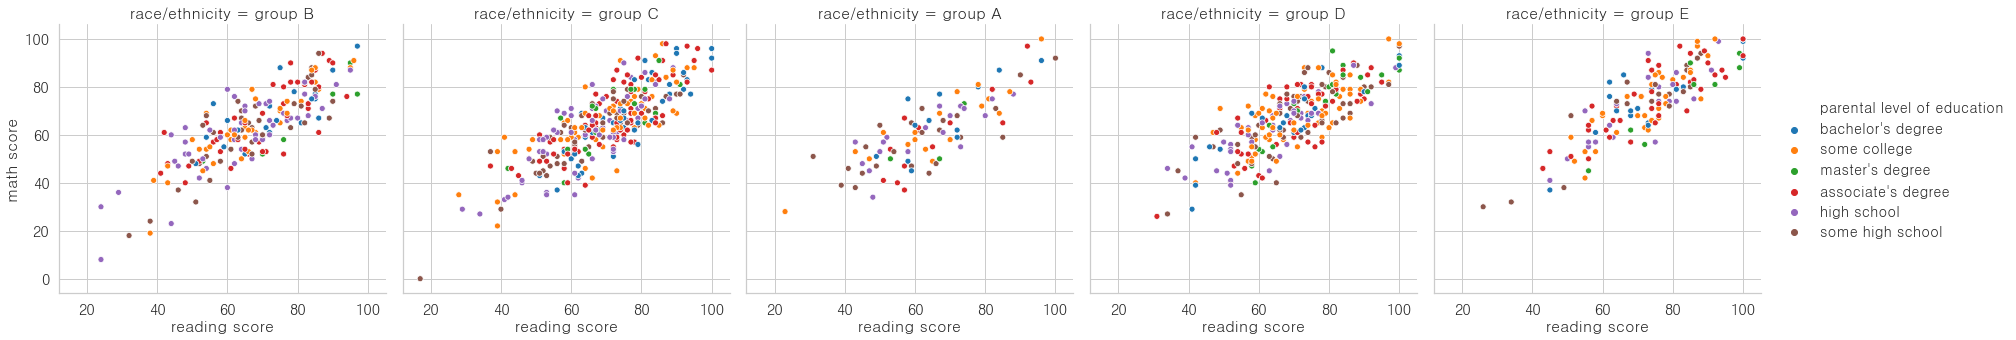

In [158]:
sns.relplot(x='reading score', y='math score', data=exam, kind='scatter',
            hue='parental level of education', col='race/ethnicity', palette='tab10')
fig.suptitle("그룹 및 부모 교육 수준에 따른 점수 분포")
plt.show()

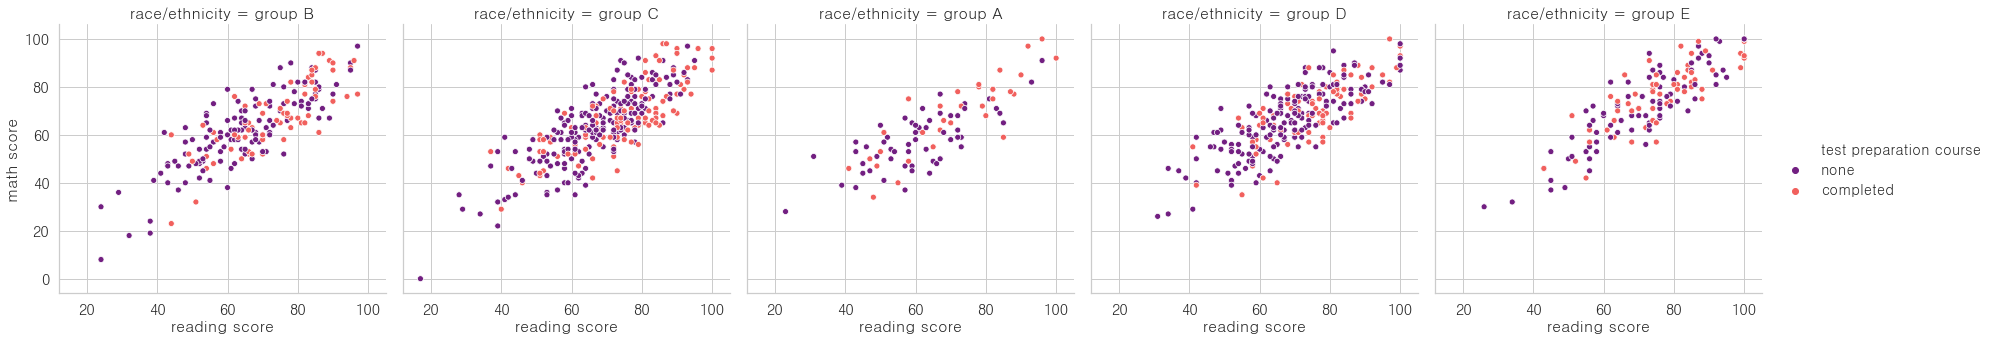

In [170]:
sns.relplot(x='reading score', y='math score', data=exam, kind='scatter',
            hue='test preparation course', col='race/ethnicity', palette='magma')
fig.suptitle("그룹 및 test preparation course 여부에 따른 점수 분포")
plt.show()

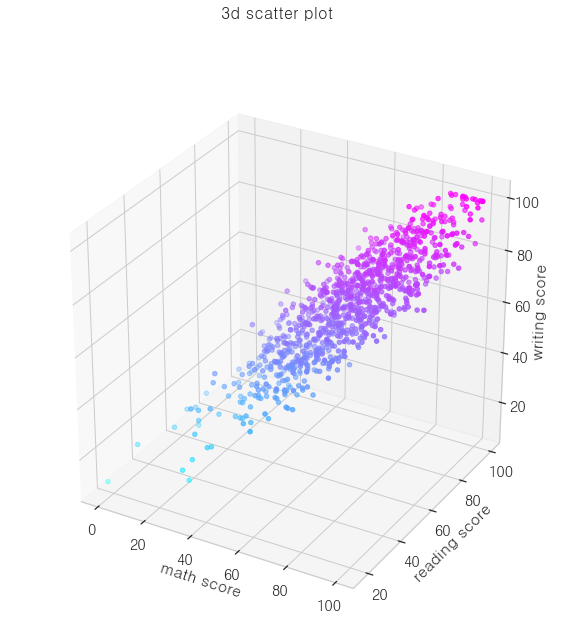

In [163]:
fig = plt.figure(figsize=(10, 10)) 
ax = plt.axes(projection='3d') #도화지를 3d로
ax.scatter3D(exam['math score'], exam['reading score'], exam['writing score'],c=exam['writing score'], cmap='cool')
ax.set_xlabel('math score')
ax.set_ylabel('reading score')
ax.set_zlabel('writing score', rotation=90)
fig.suptitle('3d scatter plot', fontsize=16)
plt.show()